In [1]:
import numpy as np
import scipy
import sklearn
import matplotlib.pyplot as plt
import matplotlib as mpl
import sympy
import pandas
import torch
# import jtplot module in notebook
from jupyterthemes import jtplot

# choose which theme to inherit plotting style from
# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
jtplot.style(theme='onedork')

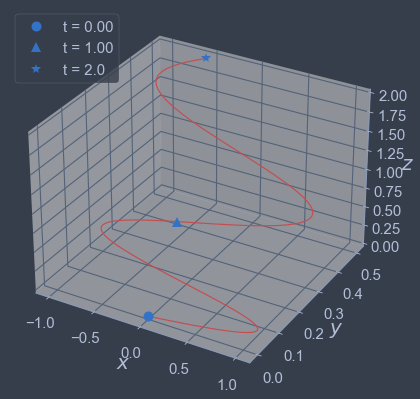

In [36]:
# 일변수 벡터함수 예제
# r(t) = (x(t), y(t), z(t)).T
# x(t) = sin(6t)
# y(t) = t/4
# z(t) = t^2/2

plt.figure(figsize=(7,7))

ax = plt.axes(projection='3d')
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.zaxis.set_tick_params(labelsize=15)
ax.set_xlabel(r'$x$', fontsize=20)
ax.set_ylabel(r'$y$', fontsize=20)
ax.set_zlabel(r'$z$', fontsize=20)

t = np.linspace(0,2,101)
x = np.sin(6*t)
y = t / 4
z = t**2 / 2

ax.plot3D(x, y, z, c='r')
ax.plot([x[0]], [y[0]], [z[0]], 'o', markersize=10, color='b',
       label="t = {:.2f}".format(t[0]))
ax.plot([x[50]], [y[50]], [z[50]], '^', markersize=10, color='b',
       label="t = {:.2f}".format(t[50]))
ax.plot([x[-1]], [y[-1]], [z[-1]], '*', markersize=10, color='b',
       label=f"t = {t[-1]}")

ax.legend(fontsize=15, loc="upper left")

plt.show()

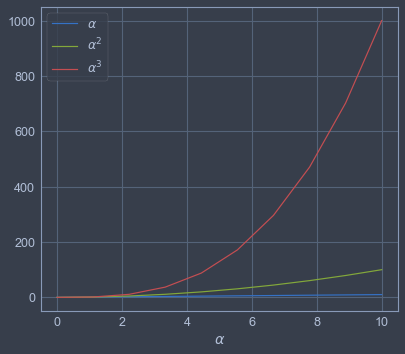

In [32]:
alpha = x=np.linspace(0,10,10)
y1=alpha
y2=alpha**2
y3=alpha**3

plt.plot(x, y1,label = r'$\alpha$')
plt.plot(x, y2,label = r'$\alpha^2$')
plt.plot(x, y3,label = r'$\alpha^3$')
plt.xlabel(r'$\alpha$')
plt.legend()
plt.show()

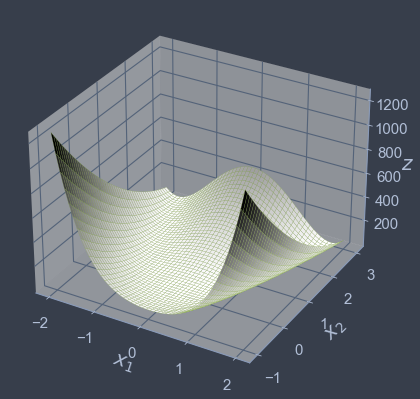

In [41]:
# 다변수 스칼라 함수
plt.figure(figsize=(7,7))

ax = plt.axes(projection='3d')
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.zaxis.set_tick_params(labelsize=15)
ax.set_xlabel(r'$x_1$', fontsize=20)
ax.set_ylabel(r'$x_2$', fontsize=20)
ax.set_zlabel(r'$z$', fontsize=20)

x1 = np.linspace(-2, 2, 50)
x2 = np.linspace(-1, 3, 50)
X1, X2 = np.meshgrid(x1, x2) # x1, x2로 만들어진 matrix form을 반환함. 
Z = 50*(X2 - X1 ** 2)**2 + (2-X1)**2

ax.plot_surface(X1,X2,Z, cmap=plt.cm.binary, edgecolor='g')

plt.show()

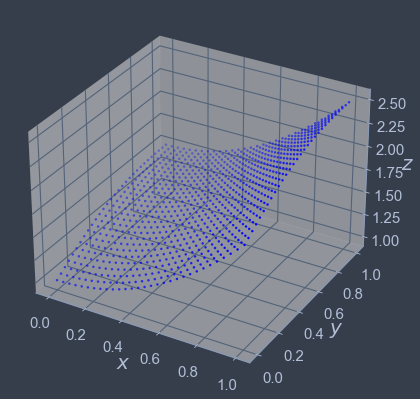

In [44]:
# 다변수 벡터함수
from mpl_toolkits import mplot3d

# 에시
# 2차원 입력 3 차원 출력
# 출력 그래프에 입력 평면이 없는 것을 주의하자.
fig = plt.figure(figsize=(7,7))
ax = plt.axes(projection='3d')
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.zaxis.set_tick_params(labelsize=15)
ax.set_xlabel(r'$x$', fontsize=20)
ax.set_ylabel(r'$y$', fontsize=20)
ax.set_zlabel(r'$z$', fontsize=20)

u = np.linspace(0, 1, 30)
v = np.linspace(0, 1, 30)
U, V = np.meshgrid(u,v)
X = U
Y = V
Z = 1 + U**2 + V/(1+V**2)

ax.scatter3D(X, Y, Z, marker='.', color='blue')

plt.show()

<ipython-input-50-e93fabf13c58>:37: RuntimeWarning: divide by zero encountered in log
  log = np.log(y)


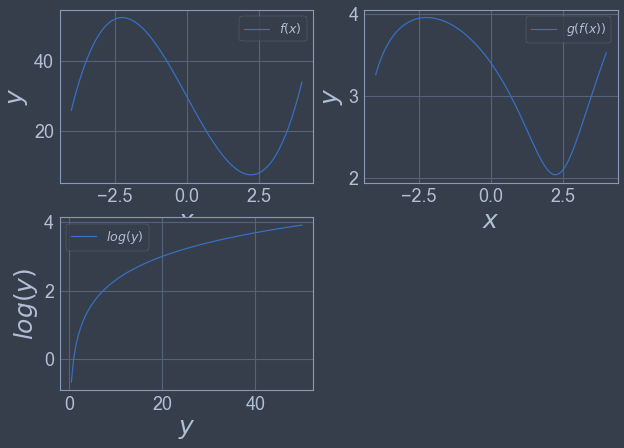

In [50]:
# 합성함수 예제

fig = plt.figure(figsize=(10,7))

ax1 = fig.add_subplot(2,2,1)
ax1.xaxis.set_tick_params(labelsize=18)
ax1.yaxis.set_tick_params(labelsize=18)

plt.xlabel('$x$', fontsize=25)
plt.ylabel('$y$', fontsize=25)

x = np.linspace(-4,4,100)
f = x**3 - 15*x + 30
ax1.plot(x,f,color='b', label=r"$f(x)$")
plt.legend()

ax2 = fig.add_subplot(2,2,2)
ax2.xaxis.set_tick_params(labelsize=18)
ax2.yaxis.set_tick_params(labelsize=18)

plt.xlabel('$x$', fontsize=25)
plt.ylabel('$y$', fontsize=25)

x = np.linspace(-4,4,100)
g = np.log(f)
ax2.plot(x,g,color='b', label=r"$g(f(x))$")
plt.legend()

ax3 = fig.add_subplot(2,2,3)
ax3.xaxis.set_tick_params(labelsize=18)
ax3.yaxis.set_tick_params(labelsize=18)

plt.xlabel('$y$', fontsize=25)
plt.ylabel('$log(y)$', fontsize=25)

y = np.linspace(0,50,100)
log = np.log(y)
ax3.plot(y,log,color='b', label=r"$log(y)$")
plt.legend()

plt.show()


In [7]:
# 다변수 벡터함수 예시
# softmax fucntion
# 입력 벡터를 확률 벡터로 출력하기에 
# 마지막 단 이용해 확률로 만들어준다.
# 특징 중 하나가 입력과 출력의 차원이 같음.

def softmax_func(Z):
    dim = len(Z)
    
    summation = 0
    for idx in range(dim):
        summation += np.e**Z[idx]
    
    S = []
    
    for idx in range(dim):
        S.append(np.e**Z[idx] / summation)
    
    return S

In [14]:
Z = [3,5,4,2,1]
S = softmax_func(Z)
print(f"prob of elements = {S}")
print(f"sum of elements = {sum(S)}")

prob of elements = [0.0861285444362687, 0.6364086465588308, 0.23412165725273662, 0.03168492079612427, 0.011656230956039609]
sum of elements = 1.0
